In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, log_loss, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import binarize
import math
import sktime

In [2]:
from sktime.registry import all_estimators
from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error, mean_squared_percentage_error, mean_squared_error
from sktime.utils.plotting import plot_series

In [85]:
from sktime.forecasting.fbprophet import Prophet

In [4]:
from sktime.forecasting.compose import TransformedTargetForecaster
from sktime.forecasting.model_selection import ForecastingGridSearchCV, SlidingWindowSplitter
from sktime.transformations.compose import OptionalPassthrough
from sktime.transformations.series.detrend import Deseasonalizer
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.arima import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [5]:
df_AQ2 = pd.read_csv('Central_Hourly_Readings_from2019.csv')

In [6]:
CO_df = df_AQ2[['IntervalStart', 'Carbon Monoxide(ppm)']]
CO_df = CO_df.dropna()
CO_df.head()

,IntervalStart,Carbon Monoxide(ppm)
0,01/01/2019 00:00:00,0.3
1,01/01/2019 01:00:00,0.3
2,01/01/2019 02:00:00,0.3
4,01/01/2019 04:00:00,0.2
5,01/01/2019 05:00:00,0.2


In [7]:
CO_df['ds'] = pd.to_datetime(CO_df['IntervalStart'])

In [8]:
CO_df = CO_df[['ds', 'Carbon Monoxide(ppm)']]
CO_df.set_index('ds', inplace=True)

In [9]:
y_train, y_test = temporal_train_test_split(CO_df['Carbon Monoxide(ppm)'], test_size=72)
fh = ForecastingHorizon(y_test.index,is_relative=False, freq='H')

16:19:23 - cmdstanpy - INFO - Chain [1] start processing
16:25:52 - cmdstanpy - INFO - Chain [1] done processing


MAPE:  0.1711214783762466
MSPE:  0.04457766118732481
MSE:  0.004617159830849026


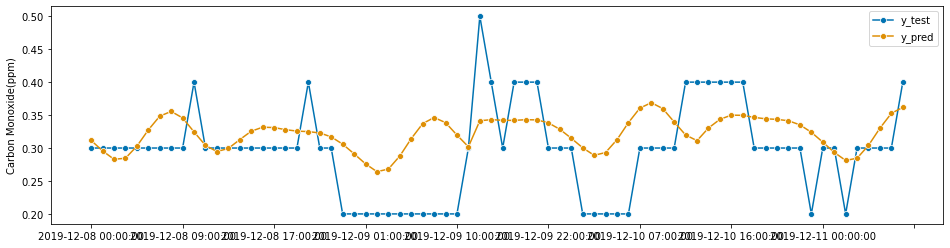

In [10]:
forecaster = Prophet(
    seasonality_mode="additive",
    n_changepoints=int(len(y_train) / 12),
    add_country_holidays={"country_name": "Canada"},
    yearly_seasonality=False,
    weekly_seasonality=True,
    daily_seasonality=True,
)

forecaster.fit(y_train)
y_pred = forecaster.predict(fh.to_relative(cutoff=y_train.index[-1]))
y_pred.index = y_test.index

plot_series(y_test, y_pred, labels=["y_test", "y_pred"])
print("MAPE: " , mean_absolute_percentage_error(y_pred, y_test))
print("MSPE: " , mean_squared_percentage_error(y_pred, y_test))
print("MSE: " , mean_squared_error(y_pred, y_test))

In [16]:
df_AQ3 = pd.read_excel('Central_AQ.xlsx')
CO_df2 = df_AQ3[['IntervalStart', 'Carbon Monoxide(ppm)']]
CO_df2 = CO_df2.dropna()
CO_df2['ds'] = pd.to_datetime(CO_df2['IntervalStart'])
CO_df2 = CO_df2[['ds', 'Carbon Monoxide(ppm)']]
CO_df2.set_index('ds', inplace=True)

ValueError: Excel file format cannot be determined, you must specify an engine manually.

In [ ]:

y_train2, y_test2 = temporal_train_test_split(CO_df2['Carbon Monoxide(ppm)'], test_size=72)
fh2 = ForecastingHorizon(y_test2.index,is_relative=False, freq='H')

In [ ]:
forecaster2 = Prophet(
    seasonality_mode="additive",
    n_changepoints=int(len(y_train2) / 12),
    add_country_holidays={"country_name": "Canada"},
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
)

forecaster2.fit(y_train2)
y_pred2 = forecaster2.predict(fh2.to_relative(cutoff=y_train2.index[-1]))
y_pred2.index = y_test2.index

plot_series(y_test2, y_pred2, labels=["y_test2", "y_pred2"])
mean_absolute_percentage_error(y_pred2, y_test2)

In [ ]:
y_train3, y_test3 = temporal_train_test_split(latest_df['Carbon Monoxide(ppm)'], test_size=72)
fh3 = ForecastingHorizon(y_test3.index,is_relative=False, freq='H')

In [ ]:
forecaster3 = Prophet(
    seasonality_mode="additive",
    n_changepoints=int(len(y_train3) / 12),
    add_country_holidays={"country_name": "Canada"},
    yearly_seasonality=False,
    weekly_seasonality=True,
    daily_seasonality=True,
)

forecaster3.fit(y_train3)
y_pred3 = forecaster3.predict(fh3.to_relative(cutoff=y_train3.index[-1]))
y_pred3.index = y_test3.index

plot_series(y_test3, y_pred3, labels=["y_test", "y_pred"])
print("MAPE: " , mean_absolute_percentage_error(y_pred3, y_test3))
print("MSPE: " , mean_squared_percentage_error(y_pred3, y_test3))
print("MSE: " , mean_squared_error(y_pred3, y_test3))

In [15]:
newest_data = pd.read_excel('New_Data.xlsx')
newest_data.tail()

,Date/Time,Air Quality Index,Carbon Monoxide,Methane,Nitric Oxide,Nitrogen Dioxide,Outdoor Air Temperature,Ozone,PM10 Mass,PM2.5 Mass,Relative Humidity,Sulphur Dioxide,Wind Direction
1456,2018-12-27,2.577567,0.307233,2.22395,0.015133,0.021600,-11.07500,0.005067,NaN,15.888867,82.75000,0.00040,164.50000
1457,2018-12-28,2.410467,0.320300,2.16305,0.013000,0.027100,-6.55625,0.008400,NaN,6.819433,79.58335,0.00005,192.20835
1458,2018-12-29,2.357800,0.246367,2.15870,0.004433,0.015667,-3.65000,0.015467,NaN,11.722200,89.14580,0.00055,138.10415
1459,2018-12-30,1.836767,0.168133,2.07825,0.004633,0.009400,-14.31455,0.014233,NaN,4.583350,75.62500,0.00060,334.95830
1460,2018-12-31,2.050700,0.255067,2.15000,0.011567,0.019600,-11.95000,0.011467,NaN,5.555533,67.70830,0.00055,178.16670


In [17]:
AQI_forecast = newest_data[['Date/Time', 'Air Quality Index']]
AQI_forecast.head()

,Date/Time,Air Quality Index
0,2015-01-01,2.405967
1,2015-01-02,2.308133
2,2015-01-03,2.387533
3,2015-01-04,2.419300
4,2015-01-05,2.965700


In [18]:
AQI_forecast = AQI_forecast.dropna()
AQI_forecast['ds'] = pd.to_datetime(AQI_forecast['Date/Time'])
AQI_forecast = AQI_forecast[['ds', 'Air Quality Index']]
AQI_forecast.set_index('ds', inplace=True)

In [19]:
y_train4, y_test4 = temporal_train_test_split(AQI_forecast['Air Quality Index'], test_size=72)
fh4 = ForecastingHorizon(y_test4.index,is_relative=False, freq='D')

16:35:57 - cmdstanpy - INFO - Chain [1] start processing
16:35:58 - cmdstanpy - INFO - Chain [1] done processing


MAPE:  0.15083821699717495
MSPE:  0.02902574361885739
MSE:  0.21373718826629565


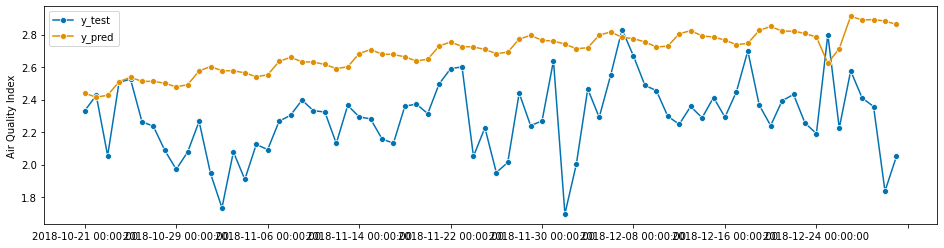

In [21]:
forecaster4 = Prophet(
    seasonality_mode="additive",
    n_changepoints= 25,
    add_country_holidays={"country_name": "Canada"},
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
)

forecaster4.fit(y_train4)
y_pred4 = forecaster4.predict(fh4.to_relative(cutoff=y_train4.index[-1]))
y_pred4.index = y_test4.index

plot_series(y_test4, y_pred4, labels=["y_test", "y_pred"])
print("MAPE: " , mean_absolute_percentage_error(y_pred4, y_test4))
print("MSPE: " , mean_squared_percentage_error(y_pred4, y_test4))
print("MSE: " , mean_squared_error(y_pred4, y_test4))

In [22]:
pivoted_df2=pd.read_excel('New_Data.xlsx')
pivoted_df2.drop(columns={'PM10 Mass'}, inplace=True)
pivoted_df2.dropna(inplace=True)
pivoted_df2['Date/Time']=pivoted_df2['Date/Time'].astype('datetime64[ns]')

In [23]:
AQI_forecast2 = pivoted_df2[['Date/Time', 'Air Quality Index']]
AQI_forecast2.set_index('Date/Time', inplace=True)
y_train5, y_test5 = temporal_train_test_split(AQI_forecast2['Air Quality Index'], test_size=72)

fh5 = ForecastingHorizon(y_test5.index,is_relative=False, freq='D')

16:36:06 - cmdstanpy - INFO - Chain [1] start processing
16:36:15 - cmdstanpy - INFO - Chain [1] done processing


MAPE:  0.15017976941097044
MSPE:  0.02887329440481275
MSE:  0.21253428892358062


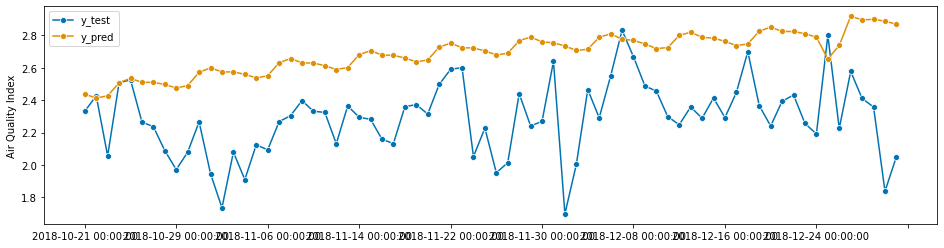

In [24]:
forecaster5 = Prophet(
    seasonality_mode="additive",
    n_changepoints= int(len(y_train5 / 12)),
    add_country_holidays={"country_name": "Canada"},
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True
)

forecaster5.fit(y_train5)
y_pred5 = forecaster5.predict(fh5.to_relative(cutoff=y_train5.index[-1]))
y_pred5.index = y_test5.index

plot_series(y_test5, y_pred5, labels=["y_test", "y_pred"])
print("MAPE: " , mean_absolute_percentage_error(y_pred5, y_test5))
print("MSPE: " , mean_squared_percentage_error(y_pred5, y_test5))
print("MSE: " , mean_squared_error(y_pred5, y_test5))

In [25]:
from datetime import datetime, timedelta

In [26]:
# Get tomorrow's date
tomorrow = datetime.today().date() + timedelta(days=1)

# Create a sequence of dates for the next 15 days starting from tomorrow
dates = pd.date_range(tomorrow, periods=15, freq='D')

# Create a DataFrame with the dates as index
test_data = pd.DataFrame(index=dates)

# Populate the DataFrame with test data (e.g., zeros)
test_data['y'] = 0

# Create the ForecastingHorizon object
fh7 = ForecastingHorizon(test_data.index, is_relative=False, freq='D')

# Generate predictions for the next 15 days starting from tomorrow
y_pred_next_15_days = forecaster5.predict(fh7.to_relative(cutoff=y_train5.index[-1]))

# Print the predictions
print(y_pred_next_15_days)

2023-03-08    4.153967
2023-03-09    4.182225
2023-03-10    4.157692
2023-03-11    4.157745
2023-03-12    4.142904
2023-03-13    4.119459
2023-03-14    4.131315
2023-03-15    4.209447
2023-03-16    4.232315
2023-03-17    4.201784
2023-03-18    4.195321
2023-03-19    4.173552
2023-03-20    4.142890
2023-03-21    4.147368
2023-03-22    4.218103
Name: Air Quality Index, dtype: float64


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='Air Quality Index'>)

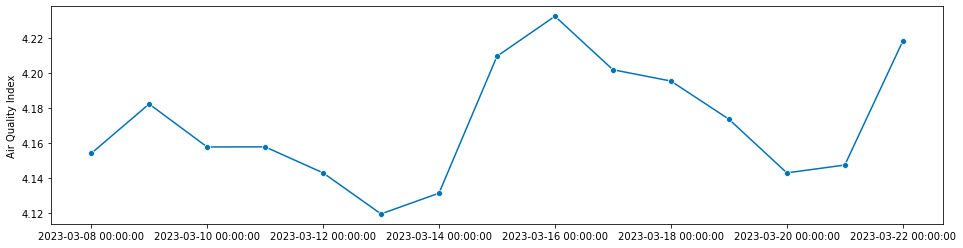

In [27]:
plot_series(y_pred_next_15_days)

In [83]:
from prophet import Prophet as fbProphet
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
pivoted_df3 = pd.read_csv('updated_dataset.csv')
pivoted_df3['Date/Time']=pivoted_df3['Date/Time'].astype('datetime64[ns]')
pivoted_df3.dropna(inplace=True)

<AxesSubplot:xlabel='ds', ylabel='y'>

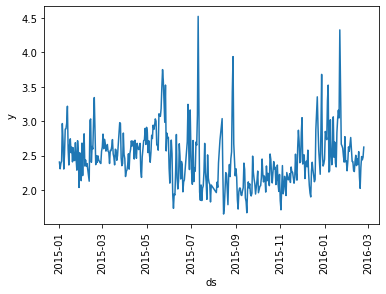

In [7]:
AQI_forecast3 = pivoted_df3[['Date/Time', 'Air Quality Index']]
#AQI_forecast3.set_index('Date/Time', inplace=True)
AQI_forecast3.rename(columns={"Date/Time": "ds", "Air Quality Index": "y"}, inplace=True)
AQI_forecast3['ds'] = AQI_forecast3['ds'].dt.tz_localize(None)
AQI_forecast3.head()
plt.xticks(rotation=90)
sns.lineplot(x=AQI_forecast3.ds, y=AQI_forecast3["y"])

16:04:08 - cmdstanpy - INFO - Chain [1] start processing
16:04:08 - cmdstanpy - INFO - Chain [1] done processing


0.1441797389052092

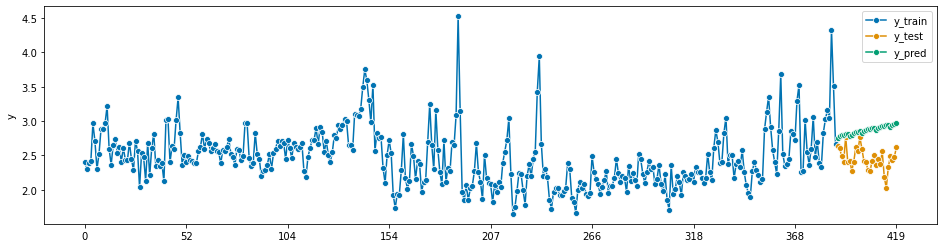

In [8]:
# Convert index to pd.DatetimeIndex
train, test = temporal_train_test_split(AQI_forecast3, test_size=30)

AQIprophet = fbProphet(daily_seasonality=True)
#AQIprophet.add_regressor('Open')

AQIprophet.add_country_holidays(country_name="Canada")
AQIprophet.add_seasonality(name="weekly", fourier_order=15, period=7)


#AQIprophet.add_regressor("Volume")
#AQIprophet.add_regressor("Dividends")
#AQIprophet.add_regressor("Stock Splits")

AQIprophet.fit(train)
preds = AQIprophet.predict(test)
preds.index = test.index
#preds

plot_series(train["y"], test["y"], preds["yhat"], labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(preds["yhat"], test["y"])

In [9]:
parameter_list = ['Outdoor Air Temperature', 'Nitric Oxide', 'Nitrogen Dioxide', 'Sulphur Dioxide', 'PM2.5 Mass', 'Ozone', 'Carbon Monoxide', 'Air Quality Index']

In [17]:
prophet_models = {}

for param in parameter_list:
    # Create a new DataFrame for the current parameter
    param_df = pivoted_df3[['Date/Time', param]]
    param_df.rename(columns={"Date/Time": "ds", param: "y"}, inplace=True)
    param_df['ds'] = param_df['ds'].dt.tz_localize(None)
    
    # Split the data into training and testing sets
    train, test = temporal_train_test_split(param_df, test_size=30)
    
    # Create a new fbProphet model and fit it to the training data
    prophet_model = fbProphet(daily_seasonality=True)
    prophet_model.add_country_holidays(country_name="Canada")
    prophet_model.add_seasonality(name="weekly", fourier_order=15, period=7)
    prophet_model.add_seasonality(name="monthly")
    prophet_model.fit(train)
    
    # Use the fitted model to make predictions on the test data
    preds = prophet_model.predict(test)
    preds.index = test.index
    
    # Store the model in the dictionary with the parameter name as the key
    prophet_models[param] = prophet_model


16:06:52 - cmdstanpy - INFO - Chain [1] start processing
16:06:53 - cmdstanpy - INFO - Chain [1] done processing
16:06:53 - cmdstanpy - INFO - Chain [1] start processing
16:06:53 - cmdstanpy - INFO - Chain [1] done processing
16:06:53 - cmdstanpy - INFO - Chain [1] start processing
16:06:54 - cmdstanpy - INFO - Chain [1] done processing
16:06:54 - cmdstanpy - INFO - Chain [1] start processing
16:06:54 - cmdstanpy - INFO - Chain [1] done processing
16:06:54 - cmdstanpy - INFO - Chain [1] start processing
16:06:54 - cmdstanpy - INFO - Chain [1] done processing
16:06:55 - cmdstanpy - INFO - Chain [1] start processing
16:06:55 - cmdstanpy - INFO - Chain [1] done processing
16:06:55 - cmdstanpy - INFO - Chain [1] start processing
16:06:55 - cmdstanpy - INFO - Chain [1] done processing
16:06:56 - cmdstanpy - INFO - Chain [1] start processing
16:06:56 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
prophet_models

{'Outdoor Air Temperature': <prophet.forecaster.Prophet at 0x15fa9a34d60>,
 'Nitric Oxide': <prophet.forecaster.Prophet at 0x15fa9a349d0>,
 'Nitrogen Dioxide': <prophet.forecaster.Prophet at 0x15fa99d6d60>,
 'Sulphur Dioxide': <prophet.forecaster.Prophet at 0x15fa9d506d0>,
 'PM2.5 Mass': <prophet.forecaster.Prophet at 0x15fa9c7d280>,
 'Ozone': <prophet.forecaster.Prophet at 0x15fa99d64f0>,
 'Carbon Monoxide': <prophet.forecaster.Prophet at 0x15fa9bd3f40>,
 'Air Quality Index': <prophet.forecaster.Prophet at 0x15fa9e30eb0>}

In [12]:
forecasted_values = pd.DataFrame()

for param in parameter_list:
    # Create a new DataFrame for the current parameter
    param_df = pivoted_df3[['Date/Time', param]]
    param_df.rename(columns={"Date/Time": "ds", param: "y"}, inplace=True)
    param_df['ds'] = param_df['ds'].dt.tz_localize(None)
    
    # Create a new future DataFrame with 14 days of daily frequency
    future = prophet_models[param].make_future_dataframe(periods=60, freq='D')
    
    # Use the fitted model to make predictions on the future data
    forecast = prophet_models[param].predict(future)
    
    # Extract the relevant columns from the forecast DataFrame
    forecast = forecast[['ds', 'yhat']]
    forecast.rename(columns={"yhat": param}, inplace=True)
    
    # Append the forecasted values to the forecasted_values DataFrame
    forecasted_values = pd.concat([forecasted_values, forecast.set_index('ds')], axis=1)


In [18]:
forecasted_values = pd.DataFrame()

for param in parameter_list:
    # Create a new DataFrame for the current parameter
    param_df = pivoted_df3[['Date/Time', param]]
    param_df.rename(columns={"Date/Time": "ds", param: "y"}, inplace=True)
    param_df['ds'] = param_df['ds'].dt.tz_localize(None)
    
    # Create a new future DataFrame with 30 days of daily frequency starting from Jan 1, 2018
    start_date = pd.Timestamp('2018-01-01')
    end_date = pd.Timestamp('2018-01-14')
    future = pd.DataFrame({'ds': pd.date_range(start=start_date, end=end_date, freq='D')})
    future['ds'] = future['ds'].dt.tz_localize(None)
    
    # Use the fitted model to make predictions on the future data
    forecast = prophet_models[param].predict(future)
    
    # Extract the relevant columns from the forecast DataFrame
    forecast = forecast[['ds', 'yhat']]
    forecast.rename(columns={"yhat": param}, inplace=True)
    
    # Append the forecasted values to the forecasted_values DataFrame
    forecasted_values = pd.concat([forecasted_values, forecast.set_index('ds')], axis=1)


In [76]:
import pandas as pd

# Create a new dataframe for the forecasting period
forecast_dates = pd.date_range(start='2018-04-15', end='2018-04-30')
forecast_df = pd.DataFrame({'ds': forecast_dates})

# Loop over the parameters in the `prophet_models` dictionary
for param, model in prophet_models.items():
    # Use the model to make predictions for the forecasting period
    param_preds = model.predict(forecast_df)
    
    # Print the predicted values for the last 5 days of April 2018
    print(f"Predictions for {param}:")
    print(param_preds[['ds', 'yhat']].tail())


Predictions for Carbon Monoxide:
           ds      yhat
11 2018-04-26  0.523354
12 2018-04-27  0.507512
13 2018-04-28  0.514395
14 2018-04-29  0.516618
15 2018-04-30  0.503237
Predictions for Methane:
           ds      yhat
11 2018-04-26  0.487281
12 2018-04-27  0.486487
13 2018-04-28  0.494382
14 2018-04-29  0.481146
15 2018-04-30  0.485951
Predictions for Nitric Oxide:
           ds      yhat
11 2018-04-26  0.048463
12 2018-04-27  0.047087
13 2018-04-28  0.046872
14 2018-04-29  0.045772
15 2018-04-30  0.046048
Predictions for Nitrogen Dioxide:
           ds      yhat
11 2018-04-26  0.030155
12 2018-04-27  0.029754
13 2018-04-28  0.029223
14 2018-04-29  0.027126
15 2018-04-30  0.027917
Predictions for Non-methane Hydrocarbons:
           ds      yhat
11 2018-04-26 -0.387265
12 2018-04-27 -0.388361
13 2018-04-28 -0.385991
14 2018-04-29 -0.386797
15 2018-04-30 -0.386213
Predictions for Outdoor Air Temperature:
           ds       yhat
11 2018-04-26 -67.899710
12 2018-04-27 -67.323853


In [77]:
forecast_df

,ds
0,2018-04-15
1,2018-04-16
2,2018-04-17
3,2018-04-18
4,2018-04-19
5,2018-04-20
6,2018-04-21
7,2018-04-22
8,2018-04-23
9,2018-04-24


In [19]:
forecasted_values

,Outdoor Air Temperature,Nitric Oxide,Nitrogen Dioxide,Sulphur Dioxide,PM2.5 Mass,Ozone,Carbon Monoxide,Air Quality Index
ds,,,,,,,,
2018-01-01,-138.544676,0.096440,0.090929,0.000126,54.740225,-0.046967,1.471144,7.008425
2018-01-02,-149.450822,0.113011,0.102106,0.000086,62.156456,-0.062017,1.524540,7.227291
2018-01-03,-149.697060,0.110377,0.101826,0.000180,62.501578,-0.061897,1.511078,7.241286
2018-01-04,-149.016820,0.109815,0.101322,0.000062,62.282179,-0.061080,1.503929,7.233965
2018-01-05,-149.477618,0.110327,0.101103,-0.000043,62.782866,-0.061172,1.517315,7.255881
2018-01-06,-150.274376,0.106022,0.098871,-0.000047,62.829189,-0.059039,1.510305,7.248290
2018-01-07,-151.014304,0.106416,0.098808,-0.000175,61.497797,-0.059407,1.504137,7.223585
2018-01-08,-150.061937,0.112396,0.102275,-0.000021,61.266744,-0.061574,1.531475,7.244359
2018-01-09,-150.807895,0.113875,0.102858,0.000079,62.623505,-0.062692,1.535853,7.271247


In [20]:
start_date = pd.Timestamp('2018-01-01')
end_date = pd.Timestamp('2018-01-30')
future_dates = pd.date_range(start=start_date, end=end_date, freq='D')
future_df = pd.DataFrame({'ds': future_dates})

In [21]:
future_df

,ds
0,2018-01-01
1,2018-01-02
2,2018-01-03
3,2018-01-04
4,2018-01-05
5,2018-01-06
6,2018-01-07
7,2018-01-08
8,2018-01-09
9,2018-01-10


In [75]:
predictions = pd.DataFrame()

for param, model in prophet_models.items():
    # Use the fitted model to make predictions on the future dates
    future = model.make_future_dataframe(periods=14, freq= 'D')
    forecast = model.predict(future)
    forecast = forecast[['ds', 'yhat']]
    forecast.rename(columns={'yhat': param}, inplace=True)
    
    # Join the forecast with the ds column from the future_df DataFrame
    forecast = pd.merge(forecast, future[['ds']], on='ds', how='right')
    forecast.set_index('ds', inplace=True)
    
    # Store the predictions in the dictionary with the parameter name as the key
    predictions[param] = forecast
    


In [73]:
predictions

,Carbon Monoxide,Methane,Nitric Oxide,Nitrogen Dioxide,Non-methane Hydrocarbons,Outdoor Air Temperature,Ozone,PM2.5 Mass,Relative Humidity,Std. Dev. of Wind Direction,Total Hydrocarbons,Total Oxides Of Nitrogen,Wind Direction,Wind Speed
ds,,,,,,,,,,,,,,
2020-01-01 00:00:00,0.447026,2.217844,0.015904,0.030504,0.016317,-14.636500,0.004509,10.666064,83.582019,23.921829,2.240354,0.045829,180.414760,4.680380
2020-01-01 01:00:00,0.436240,2.222413,0.015778,0.030084,0.016485,-14.996118,0.004235,10.293458,84.752443,24.181998,2.245073,0.045283,180.482104,4.654786
2020-01-01 02:00:00,0.427718,2.227114,0.015547,0.029755,0.017322,-15.347170,0.003813,9.894684,85.859774,24.279947,2.250590,0.044726,180.376175,4.631205
2020-01-01 04:00:00,0.424670,2.239662,0.015300,0.030220,0.018597,-15.972744,0.001990,9.279967,88.045960,23.680857,2.264310,0.044954,182.907875,4.748280
2020-01-01 05:00:00,0.432571,2.243876,0.015971,0.031129,0.018050,-16.085899,0.000873,9.115907,88.599107,23.203004,2.267909,0.046534,185.026487,4.908405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-27 15:00:00,0.241656,2.114074,0.003115,0.008534,-0.033299,4.307333,0.034525,-2.781566,59.828910,26.573276,2.131509,0.012793,217.687135,9.471793
2023-03-28 15:00:00,0.250650,2.114592,0.004148,0.008956,-0.032195,4.009830,0.034941,-2.085029,59.115506,27.252370,2.133885,0.014257,223.014154,9.227345
2023-03-29 15:00:00,0.227749,2.099926,0.002416,0.007840,-0.038151,4.498863,0.035869,-4.687472,58.134609,26.173623,2.113852,0.011414,227.852048,9.691888


In [15]:
df_ = pd.read_excel('New_Data.xlsx')
df_.head(20)

,Date/Time,Air Quality Index,Carbon Monoxide,Methane,Nitric Oxide,Nitrogen Dioxide,Outdoor Air Temperature,Ozone,PM10 Mass,PM2.5 Mass,Relative Humidity,Sulphur Dioxide,Wind Direction
0,2015-01-01,2.405967,0.197200,1.94790,0.002200,0.007067,2.816700,0.027900,1.0000,2.277767,75.8750,0.00120,220.33335
1,2015-01-02,2.308133,0.205567,2.01040,0.011400,0.017633,-16.137500,0.018600,3.0435,6.213633,80.7083,0.00185,131.31250
2,2015-01-03,2.387533,0.172233,2.03125,0.005867,0.017600,-21.713400,0.018467,4.0417,6.731467,70.7500,0.00070,301.35415
3,2015-01-04,2.419300,0.250033,2.22500,0.012100,0.025067,-24.945800,0.011300,6.8750,8.442467,69.9583,0.00100,198.10415
4,2015-01-05,2.965700,0.345833,2.26250,0.027367,0.032533,-20.145800,0.006267,9.2500,17.488900,67.3750,0.00125,227.60415
5,2015-01-06,2.709700,0.288900,2.09375,0.020500,0.027733,-16.718750,0.010633,12.0870,14.077000,72.7917,0.00190,182.45835
6,2015-01-07,2.304533,0.216300,2.03955,0.007333,0.015367,-11.566650,0.019600,6.5217,8.328700,72.4167,0.00180,234.45835
7,2015-01-08,2.517533,0.234100,2.00625,0.011967,0.019733,-15.540267,0.018633,3.8636,5.848500,67.1667,0.00065,286.91670
8,2015-01-09,2.884167,0.341700,2.36665,0.033833,0.035700,-18.747233,0.005133,6.5000,14.494967,71.4167,0.00125,224.22915
9,2015-01-10,2.888400,0.357133,2.17295,0.017333,0.028867,-14.751367,0.006633,11.0417,18.473500,75.9167,0.00115,220.00000


In [16]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date/Time                1461 non-null   datetime64[ns]
 1   Air Quality Index        1461 non-null   float64       
 2   Carbon Monoxide          1461 non-null   float64       
 3   Methane                  1459 non-null   float64       
 4   Nitric Oxide             1461 non-null   float64       
 5   Nitrogen Dioxide         1461 non-null   float64       
 6   Outdoor Air Temperature  1461 non-null   float64       
 7   Ozone                    1461 non-null   float64       
 8   PM10 Mass                412 non-null    float64       
 9   PM2.5 Mass               1461 non-null   float64       
 10  Relative Humidity        1452 non-null   float64       
 11  Sulphur Dioxide          1461 non-null   float64       
 12  Wind Direction           1461 non-

In [31]:
df_2 = pd.read_csv('Central_Hourly_Readings_from2019.csv')
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35808 entries, 0 to 35807
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   IntervalStart                   17544 non-null  object 
 1   IntervalEnd                     17544 non-null  object 
 2   Carbon Monoxide(ppm)            7865 non-null   float64
 3   Methane(ppm)                    7839 non-null   float64
 4   Nitric Oxide(ppm)               16677 non-null  float64
 5   Nitrogen Dioxide(ppm)           16677 non-null  float64
 6    Non-methane Hydrocarbons(ppm)  7839 non-null   float64
 7   Outdoor Air Temperature(deg C)  10235 non-null  float64
 8   Ozone(ppm)                      16616 non-null  float64
 9   PM2.5 Mass(ug/m3)               16321 non-null  float64
 10  Total Hydrocarbons(ppm)         7839 non-null   float64
 11  Total Oxides Of Nitrogen(ppm)   16677 non-null  float64
dtypes: float64(10), object(2)
memory

In [35]:
df_2.head(100)

,IntervalStart,IntervalEnd,Carbon Monoxide(ppm),Methane(ppm),Nitric Oxide(ppm),Nitrogen Dioxide(ppm),Non-methane Hydrocarbons(ppm),Outdoor Air Temperature(deg C),Ozone(ppm),PM2.5 Mass(ug/m3),Total Hydrocarbons(ppm),Total Oxides Of Nitrogen(ppm)
0,01/01/2019 00:00:00,01/01/2019 00:59:00,0.3,2.2,0.0098,0.0265,0.0,NaN,0.011,11.0,2.2,0.0363
1,01/01/2019 01:00:00,01/01/2019 01:59:00,0.3,2.1,0.0163,0.0293,0.0,NaN,0.011,8.0,2.1,0.0456
2,01/01/2019 02:00:00,01/01/2019 02:59:00,0.3,2.2,0.0126,0.0271,0.0,NaN,0.013,7.0,2.2,0.0397
3,01/01/2019 03:00:00,01/01/2019 03:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01/01/2019 04:00:00,01/01/2019 04:59:00,0.2,2.1,0.0084,0.0227,0.0,NaN,0.020,0.0,2.1,0.0311
...,...,...,...,...,...,...,...,...,...,...,...,...
95,01/04/2019 23:00:00,01/04/2019 23:59:00,0.3,2.1,0.0073,0.0253,0.0,NaN,0.011,11.0,2.1,0.0326
96,01/05/2019 00:00:00,01/05/2019 00:59:00,0.3,2.1,0.0061,0.0241,0.0,NaN,0.013,15.0,2.1,0.0302
97,01/05/2019 01:00:00,01/05/2019 01:59:00,0.3,2.1,0.0079,0.0194,0.0,NaN,0.017,6.0,2.1,0.0273
98,01/05/2019 02:00:00,01/05/2019 02:59:00,0.3,2.2,0.0090,0.0225,0.0,NaN,0.015,9.0,2.2,0.0315


In [24]:
df3 = pd.read_csv('Communities AQHI.csv')

In [25]:
df3.head()

,Date,Edmonton
0,Apr 3 2022 09:00 MDT,2.0
1,Apr 3 2022 10:00 MDT,2.0
2,Apr 3 2022 11:00 MDT,2.0
3,Apr 3 2022 12:00 MDT,2.0
4,Apr 3 2022 13:00 MDT,3.0


In [26]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8738 entries, 0 to 8737
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      8738 non-null   object 
 1   Edmonton  8736 non-null   float64
dtypes: float64(1), object(1)
memory usage: 136.7+ KB


In [27]:
df3['Date']=df3['Date'].astype('datetime64[ns]')

<AxesSubplot:xlabel='ds', ylabel='y'>

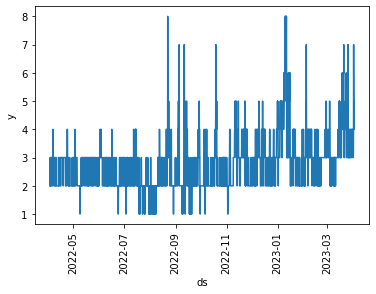

In [28]:
df3.rename(columns={"Date": "ds", "Edmonton": "y"}, inplace=True)
df3['ds'] = df3['ds'].dt.tz_localize(None)
df3.head()
plt.xticks(rotation=90)
sns.lineplot(x=df3.ds, y=df3["y"])

16:46:04 - cmdstanpy - INFO - Chain [1] start processing
16:46:07 - cmdstanpy - INFO - Chain [1] done processing


0.16918100350241053

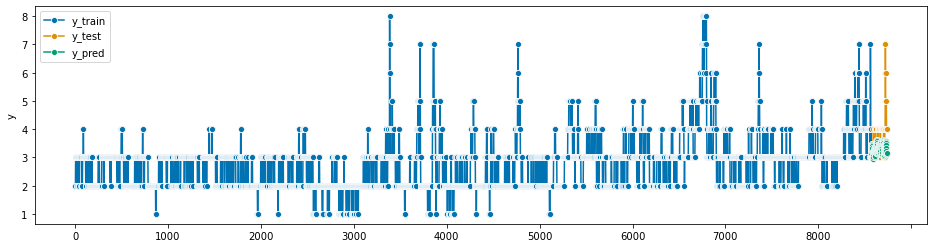

In [69]:
# Convert index to pd.DatetimeIndex
train, test = temporal_train_test_split(df3, test_size=24*7)

AQI3 = fbProphet(daily_seasonality=True)
#AQIprophet.add_regressor('Open')

AQI3.add_country_holidays(country_name="Canada")
AQI3.add_seasonality(name="weekly", fourier_order=15, period=7)


#AQIprophet.add_regressor("Volume")
#AQIprophet.add_regressor("Dividends")
#AQIprophet.add_regressor("Stock Splits")

AQI3.fit(train)
preds = AQI3.predict(test)
preds.index = test.index
#preds

plot_series(train["y"], test["y"], preds["yhat"], labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(preds["yhat"], test["y"])

In [56]:
start_date = pd.Timestamp('2023-04-15')
end_date = pd.Timestamp('2023-04-30')
future_dates = pd.date_range(start=start_date, end=end_date, freq='H')
future_df2 = pd.DataFrame({'ds': future_dates})
future_df2['ds']=future_df2['ds'].astype('datetime64[ns]')
future_df2['ds'] = future_df2['ds'].dt.tz_localize(None)

In [57]:
future_df2

,ds
0,2023-04-15 00:00:00
1,2023-04-15 01:00:00
2,2023-04-15 02:00:00
3,2023-04-15 03:00:00
4,2023-04-15 04:00:00
...,...
356,2023-04-29 20:00:00
357,2023-04-29 21:00:00
358,2023-04-29 22:00:00
359,2023-04-29 23:00:00


In [70]:
future_preds = AQI3.predict(future_df2)

In [71]:
future_preds

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Boxing Day,Boxing Day_lower,Boxing Day_upper,Canada Day,...,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-04-15 00:00:00,3.330595,2.347864,4.431805,3.330595,3.330595,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.060827,0.060827,0.060827,0.0,0.0,0.0,3.446572
1,2023-04-15 01:00:00,3.330611,2.293151,4.498843,3.330611,3.330611,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.042082,0.042082,0.042082,0.0,0.0,0.0,3.393520
2,2023-04-15 02:00:00,3.330628,2.393161,4.393166,3.330628,3.330628,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.019740,0.019740,0.019740,0.0,0.0,0.0,3.339953
3,2023-04-15 03:00:00,3.330645,2.213961,4.304299,3.330645,3.330645,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.007566,-0.007566,-0.007566,0.0,0.0,0.0,3.286231
4,2023-04-15 04:00:00,3.330662,2.184929,4.307083,3.330662,3.330662,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.039896,-0.039896,-0.039896,0.0,0.0,0.0,3.225630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,2023-04-29 20:00:00,3.336584,2.410365,4.486554,3.320843,3.354703,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.094795,0.094795,0.094795,0.0,0.0,0.0,3.508153
357,2023-04-29 21:00:00,3.336601,2.545903,4.644144,3.320788,3.354790,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.126167,0.126167,0.126167,0.0,0.0,0.0,3.547377
358,2023-04-29 22:00:00,3.336618,2.493626,4.671233,3.320732,3.354877,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.159693,0.159693,0.159693,0.0,0.0,0.0,3.586744
359,2023-04-29 23:00:00,3.336635,2.572345,4.706640,3.320677,3.354965,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.192048,0.192048,0.192048,0.0,0.0,0.0,3.610183


In [63]:
future_preds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 64 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   ds                               361 non-null    datetime64[ns]
 1   trend                            361 non-null    float64       
 2   yhat_lower                       361 non-null    float64       
 3   yhat_upper                       361 non-null    float64       
 4   trend_lower                      361 non-null    float64       
 5   trend_upper                      361 non-null    float64       
 6   Boxing Day                       361 non-null    float64       
 7   Boxing Day_lower                 361 non-null    float64       
 8   Boxing Day_upper                 361 non-null    float64       
 9   Canada Day                       361 non-null    float64       
 10  Canada Day_lower                 361 non-null    float64      

In [64]:
dff = future_preds[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [66]:
dff.to_csv('AQI_hourly_predictions.csv', index=False)

In [65]:
dff

,ds,yhat,yhat_lower,yhat_upper
0,2023-04-15 00:00:00,3.459095,2.361371,4.518866
1,2023-04-15 01:00:00,3.398503,2.399135,4.376390
2,2023-04-15 02:00:00,3.338335,2.299290,4.444153
3,2023-04-15 03:00:00,3.284390,2.231749,4.303890
4,2023-04-15 04:00:00,3.233854,2.163352,4.342416
...,...,...,...,...
356,2023-04-29 20:00:00,3.519530,2.419203,4.592480
357,2023-04-29 21:00:00,3.528911,2.465231,4.624593
358,2023-04-29 22:00:00,3.530071,2.555409,4.481146
359,2023-04-29 23:00:00,3.508679,2.439043,4.587437


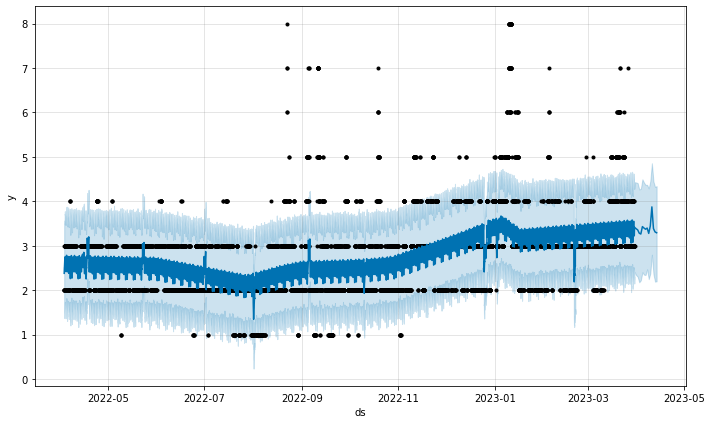

In [20]:
future = AQI3.make_future_dataframe(periods=14, freq= 'd')
forecast = AQI3.predict(future)
fig = AQI3.plot(forecast)

In [73]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Boxing Day,Boxing Day_lower,Boxing Day_upper,Canada Day,...,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-04-03 09:00:00,2.580984,1.292432,3.403108,2.580984,2.580984,0.0,0.0,0.0,0.0,...,0.00000,0.00000,0.00000,-0.152461,-0.152461,-0.152461,0.0,0.0,0.0,2.378409
1,2022-04-03 10:00:00,2.580953,1.366469,3.462977,2.580953,2.580953,0.0,0.0,0.0,0.0,...,0.00000,0.00000,0.00000,-0.124771,-0.124771,-0.124771,0.0,0.0,0.0,2.448710
2,2022-04-03 11:00:00,2.580922,1.486705,3.488502,2.580922,2.580922,0.0,0.0,0.0,0.0,...,0.00000,0.00000,0.00000,-0.093940,-0.093940,-0.093940,0.0,0.0,0.0,2.493820
3,2022-04-03 12:00:00,2.580890,1.464815,3.597707,2.580890,2.580890,0.0,0.0,0.0,0.0,...,0.00000,0.00000,0.00000,-0.064069,-0.064069,-0.064069,0.0,0.0,0.0,2.510351
4,2022-04-03 13:00:00,2.580859,1.476821,3.512410,2.580859,2.580859,0.0,0.0,0.0,0.0,...,0.00000,0.00000,0.00000,-0.037716,-0.037716,-0.037716,0.0,0.0,0.0,2.518183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8675,2023-04-09 10:00:00,3.412602,2.491767,4.520875,3.392292,3.436252,0.0,0.0,0.0,0.0,...,0.00000,0.00000,0.00000,0.040239,0.040239,0.040239,0.0,0.0,0.0,3.445370
8676,2023-04-10 10:00:00,3.415477,2.886112,4.817730,3.391503,3.443948,0.0,0.0,0.0,0.0,...,0.46189,0.46189,0.46189,0.004300,0.004300,0.004300,0.0,0.0,0.0,3.874194
8677,2023-04-11 10:00:00,3.418351,2.383264,4.340467,3.389933,3.453136,0.0,0.0,0.0,0.0,...,0.00000,0.00000,0.00000,-0.025058,-0.025058,-0.025058,0.0,0.0,0.0,3.385821
8678,2023-04-12 10:00:00,3.421225,2.334161,4.315021,3.386604,3.462757,0.0,0.0,0.0,0.0,...,0.00000,0.00000,0.00000,-0.103102,-0.103102,-0.103102,0.0,0.0,0.0,3.310652


In [75]:
forecast.tail(14)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Boxing Day,Boxing Day_lower,Boxing Day_upper,Canada Day,...,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
8666,2023-03-31 10:00:00,3.386733,2.374337,4.310544,3.386733,3.386733,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.004300,0.004300,0.004300,0.0,0.0,0.0,3.383561
8667,2023-04-01 10:00:00,3.389608,2.316029,4.353601,3.389608,3.389608,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,-0.025058,-0.025058,-0.025058,0.0,0.0,0.0,3.357078
8668,2023-04-02 10:00:00,3.392482,2.224370,4.360918,3.392482,3.392482,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,-0.103102,-0.103102,-0.103102,0.0,0.0,0.0,3.281908
8669,2023-04-03 10:00:00,3.395356,2.234377,4.238621,3.394091,3.396544,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,-0.124771,-0.124771,-0.124771,0.0,0.0,0.0,3.263113
8670,2023-04-04 10:00:00,3.398231,2.418951,4.431244,3.395225,3.402012,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.040239,0.040239,0.040239,0.0,0.0,0.0,3.430998
8671,2023-04-05 10:00:00,3.401105,2.307709,4.310279,3.395061,3.407520,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.004300,0.004300,0.004300,0.0,0.0,0.0,3.397933
8672,2023-04-06 10:00:00,3.403979,2.389944,4.437183,3.394568,3.414195,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,-0.025058,-0.025058,-0.025058,0.0,0.0,0.0,3.371450
8673,2023-04-07 10:00:00,3.406854,2.363272,4.439249,3.393865,3.421573,0.0,0.0,0.0,0.0,...,0.101401,0.101401,0.101401,-0.103102,-0.103102,-0.103102,0.0,0.0,0.0,3.397681
8674,2023-04-08 10:00:00,3.409728,2.226170,4.274617,3.393169,3.428679,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,-0.124771,-0.124771,-0.124771,0.0,0.0,0.0,3.277485
8675,2023-04-09 10:00:00,3.412602,2.491767,4.520875,3.392292,3.436252,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.040239,0.040239,0.040239,0.0,0.0,0.0,3.445370


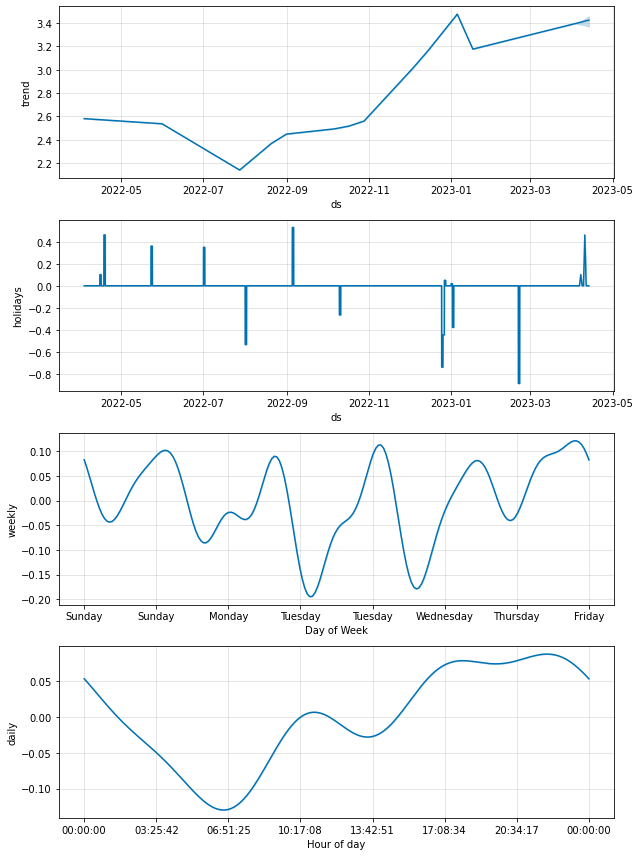

In [21]:
fig2 = AQI3.plot_components(forecast)

In [91]:
from prophet.diagnostics import cross_validation
AQI3 = fbProphet(daily_seasonality=True)
AQI3.add_country_holidays(country_name="Canada")
AQI3.add_seasonality(name="weekly", fourier_order=5, period=4)

AQI3.fit(df3)

df_cv = cross_validation(AQI3, initial='300 days', period='180 days', horizon = '60 days')
df_cv.head()

12:37:11 - cmdstanpy - INFO - Chain [1] start processing
12:37:19 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1 [00:00<?, ?it/s]

12:37:20 - cmdstanpy - INFO - Chain [1] start processing
12:37:25 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2023-02-01 11:00:00,3.298149,2.193979,4.322741,2.0,2023-02-01 10:00:00
1,2023-02-01 12:00:00,3.321097,2.278008,4.372098,2.0,2023-02-01 10:00:00
2,2023-02-01 13:00:00,3.331572,2.291192,4.296351,2.0,2023-02-01 10:00:00
3,2023-02-01 14:00:00,3.354461,2.340780,4.388112,2.0,2023-02-01 10:00:00
4,2023-02-01 15:00:00,3.400105,2.311045,4.402797,2.0,2023-02-01 10:00:00


In [92]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,5 days 23:00:00,1.099101,1.048380,0.857182,0.311206,0.191949,0.266502,0.636364
1,6 days 00:00:00,1.088202,1.043169,0.850592,0.307496,0.189464,0.263858,0.643357
2,6 days 01:00:00,1.077210,1.037887,0.844266,0.303848,0.188623,0.261294,0.650350
3,6 days 02:00:00,1.066206,1.032572,0.838078,0.300233,0.187591,0.258770,0.657343
4,6 days 03:00:00,1.054878,1.027072,0.831846,0.296577,0.185874,0.256234,0.664336


In [88]:
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,5 days 23:00:00,1.100643,1.049115,0.864369,0.312205,0.195586,0.268594,0.636364
1,6 days 00:00:00,1.089358,1.043723,0.857544,0.308398,0.195531,0.265882,0.643357
2,6 days 01:00:00,1.077858,1.038199,0.850889,0.304618,0.192173,0.263222,0.650350
3,6 days 02:00:00,1.066230,1.032584,0.844281,0.300839,0.190600,0.260578,0.657343
4,6 days 03:00:00,1.054173,1.026729,0.837546,0.296990,0.190102,0.257899,0.664336
...,...,...,...,...,...,...,...,...
1292,59 days 20:00:00,0.595785,0.771871,0.602257,0.168888,0.185788,0.161947,0.930070
1293,59 days 21:00:00,0.596222,0.772154,0.602677,0.168707,0.185788,0.161924,0.930070
1294,59 days 22:00:00,0.595947,0.771976,0.602422,0.168318,0.184501,0.161709,0.930070
1295,59 days 23:00:00,0.596438,0.772294,0.603019,0.168467,0.184501,0.161875,0.930070


<AxesSubplot:xlabel='horizon', ylabel='mape'>

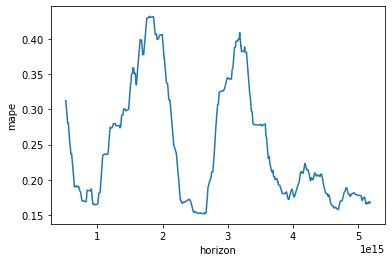

In [89]:
sns.lineplot(data=df_p, x="horizon", y="mape")

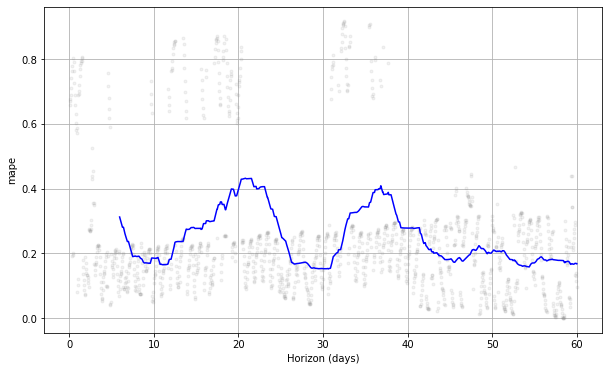

In [90]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [43]:
parameter_list = ['Carbon Monoxide',
                  'Methane',  
                  'Nitric Oxide', 
                  'Nitrogen Dioxide',
                  'Non-methane Hydrocarbons',
                  'Outdoor Air Temperature',
                  'Ozone', 
                  'PM2.5 Mass',
                  'Relative Humidity',
                  'Std. Dev. of Wind Direction',
                  'Total Hydrocarbons',
                  'Total Oxides Of Nitrogen',
                  'Wind Direction',
                  'Wind Speed']

In [44]:
new_param_df = pd.read_csv('mac_new_param_data.csv')

In [53]:
new_param_df.head()

,Date,Carbon Monoxide,Methane,Nitric Oxide,Nitrogen Dioxide,Non-methane Hydrocarbons,Outdoor Air Temperature,Ozone,PM2.5 Mass,Relative Humidity,Std. Dev. of Wind Direction,Total Hydrocarbons,Total Oxides Of Nitrogen,Wind Direction,Wind Speed
0,01/01/2020 00:00:00,0.5,2.20,0.0078,0.0288,0.0,2.5,0.010,5.2,64.0,23.0,2.20,0.0366,262.6,5.6
1,01/01/2020 01:00:00,0.3,2.15,0.0013,0.0161,0.0,2.9,0.018,3.7,64.0,17.0,2.15,0.0174,250.4,8.2
2,01/01/2020 02:00:00,0.3,2.03,0.0015,0.0155,0.0,2.7,0.018,3.4,70.0,17.0,2.03,0.0170,251.4,8.1
3,01/01/2020 03:00:00,NaN,NaN,NaN,NaN,NaN,2.3,NaN,3.2,74.0,20.0,NaN,NaN,262.7,5.4
4,01/01/2020 04:00:00,0.4,2.15,0.0037,0.0254,0.0,2.0,0.008,3.3,77.0,21.0,2.15,0.0291,267.7,4.9


In [45]:
new_param_df['Date']=new_param_df['Date'].astype('datetime64[ns]')

In [46]:
new_param_df.rename(columns={"Date": "ds", "Edmonton": "y"}, inplace=True)
new_param_df['ds'] = new_param_df['ds'].dt.tz_localize(None)
new_param_df.dropna(inplace=True)
new_param_df.head()


,ds,Carbon Monoxide,Methane,Nitric Oxide,Nitrogen Dioxide,Non-methane Hydrocarbons,Outdoor Air Temperature,Ozone,PM2.5 Mass,Relative Humidity,Std. Dev. of Wind Direction,Total Hydrocarbons,Total Oxides Of Nitrogen,Wind Direction,Wind Speed
0,2020-01-01 00:00:00,0.5,2.20,0.0078,0.0288,0.0,2.5,0.010,5.2,64.0,23.0,2.20,0.0366,262.6,5.6
1,2020-01-01 01:00:00,0.3,2.15,0.0013,0.0161,0.0,2.9,0.018,3.7,64.0,17.0,2.15,0.0174,250.4,8.2
2,2020-01-01 02:00:00,0.3,2.03,0.0015,0.0155,0.0,2.7,0.018,3.4,70.0,17.0,2.03,0.0170,251.4,8.1
4,2020-01-01 04:00:00,0.4,2.15,0.0037,0.0254,0.0,2.0,0.008,3.3,77.0,21.0,2.15,0.0291,267.7,4.9
5,2020-01-01 05:00:00,0.3,2.19,0.0060,0.0280,0.0,1.7,0.006,3.3,80.0,13.0,2.19,0.0340,261.1,5.4


In [50]:
new_param_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23984 entries, 0 to 27047
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ds                           23984 non-null  datetime64[ns]
 1   Carbon Monoxide              23984 non-null  float64       
 2   Methane                      23984 non-null  float64       
 3   Nitric Oxide                 23984 non-null  float64       
 4   Nitrogen Dioxide             23984 non-null  float64       
 5   Non-methane Hydrocarbons     23984 non-null  float64       
 6   Outdoor Air Temperature      23984 non-null  float64       
 7   Ozone                        23984 non-null  float64       
 8   PM2.5 Mass                   23984 non-null  float64       
 9   Relative Humidity            23984 non-null  float64       
 10  Std. Dev. of Wind Direction  23984 non-null  float64       
 11  Total Hydrocarbons           23984 non-nu

In [47]:
from sklearn.preprocessing import MinMaxScaler

prophet_models = {}

for param in parameter_list:
    # Create a new DataFrame for the current parameter
    param_df = new_param_df[['ds', param]]
    param_df.rename(columns={"ds": "ds", param: "y"}, inplace=True)
    param_df['ds'] = param_df['ds'].dt.tz_localize(None)
    
    # Scale the data to the range of 0 to 1
    #scaler = MinMaxScaler(feature_range=(0, 1))
    #scaled_data = scaler.fit_transform(param_df[['y']])
    #param_df['y'] = scaled_data.flatten()
    
    # Split the data into training and testing sets
    train, test = temporal_train_test_split(param_df, test_size=30)
    
    # Create a new fbProphet model and fit it to the training data
    prophet_model = fbProphet(daily_seasonality=True)
    prophet_model.add_country_holidays(country_name="Canada")
    prophet_model.add_seasonality(name="weekly", fourier_order=5, period=7)
    prophet_model.fit(train)
    
    # Use the fitted model to make predictions on the test data
    preds = prophet_model.predict(test)
    preds.index = test.index
    
    # Store the model in the dictionary with the parameter name as the key
    prophet_models[param] = prophet_model


16:14:46 - cmdstanpy - INFO - Chain [1] start processing
16:15:29 - cmdstanpy - INFO - Chain [1] done processing
16:15:32 - cmdstanpy - INFO - Chain [1] start processing
16:16:31 - cmdstanpy - INFO - Chain [1] done processing
16:16:34 - cmdstanpy - INFO - Chain [1] start processing
16:17:03 - cmdstanpy - INFO - Chain [1] done processing
16:17:07 - cmdstanpy - INFO - Chain [1] start processing
16:17:17 - cmdstanpy - INFO - Chain [1] done processing
16:17:20 - cmdstanpy - INFO - Chain [1] start processing
16:17:43 - cmdstanpy - INFO - Chain [1] done processing
16:17:46 - cmdstanpy - INFO - Chain [1] start processing
16:18:14 - cmdstanpy - INFO - Chain [1] done processing
16:18:18 - cmdstanpy - INFO - Chain [1] start processing
16:18:35 - cmdstanpy - INFO - Chain [1] done processing
16:18:38 - cmdstanpy - INFO - Chain [1] start processing
16:19:33 - cmdstanpy - INFO - Chain [1] done processing
16:19:37 - cmdstanpy - INFO - Chain [1] start processing
16:19:47 - cmdstanpy - INFO - Chain [1]

In [60]:
predictions = pd.DataFrame()

for param, model in prophet_models.items():
    # Use the fitted model to make predictions on the future dates
    forecast = model.predict(future_df2)
    forecast = forecast[['ds', 'yhat']]
    forecast.rename(columns={'yhat': param}, inplace=True)
    
    # Join the forecast with the ds column from the future_df2 DataFrame
    forecast = pd.merge(forecast, future_df2[['ds']], on='ds', how='right')
    forecast.set_index('ds', inplace=True)
    
    # Store the predictions in the dictionary with the parameter name as the key
    predictions[param] = forecast
    

In [61]:
predictions.head(20)

,Carbon Monoxide,Methane,Nitric Oxide,Nitrogen Dioxide,Non-methane Hydrocarbons,Outdoor Air Temperature,Ozone,PM2.5 Mass,Relative Humidity,Std. Dev. of Wind Direction,Total Hydrocarbons,Total Oxides Of Nitrogen,Wind Direction,Wind Speed
ds,,,,,,,,,,,,,,
2023-04-15 00:00:00,0.214692,2.155085,0.001243,0.010468,-0.048537,3.955932,0.029958,-6.392099,64.405666,23.578333,2.168015,0.012773,219.869605,7.815037
2023-04-15 01:00:00,0.203521,2.160272,0.001074,0.009994,-0.048189,3.582767,0.029757,-6.639111,65.617056,23.788248,2.173601,0.012128,219.838559,7.788120
2023-04-15 02:00:00,0.194933,2.165561,0.000811,0.009623,-0.047191,3.216364,0.029399,-6.883398,66.763929,23.848352,2.179934,0.011495,219.718200,7.761306
2023-04-15 03:00:00,0.190745,2.172088,0.000521,0.009573,-0.046112,2.854865,0.028710,-7.056853,67.946075,23.649092,2.187567,0.011158,220.564493,7.780661
2023-04-15 04:00:00,0.192682,2.179130,0.000533,0.010033,-0.045657,2.554608,0.027677,-7.112378,69.025525,23.205926,2.195069,0.011634,222.486284,7.868189
2023-04-15 05:00:00,0.201402,2.183747,0.001202,0.010925,-0.046110,2.420598,0.026597,-7.052126,69.615134,22.719385,2.199232,0.013194,224.862527,8.022501
2023-04-15 06:00:00,0.214793,2.182187,0.002542,0.011784,-0.047140,2.557769,0.026048,-6.928528,69.256505,22.504383,2.196651,0.015390,227.154348,8.236215
2023-04-15 07:00:00,0.227427,2.172244,0.004076,0.011967,-0.048153,3.014256,0.026623,-6.814147,67.679571,22.809003,2.185723,0.017103,229.426048,8.507500
2023-04-15 08:00:00,0.232700,2.154836,0.005079,0.011052,-0.048818,3.754921,0.028574,-6.761284,64.967860,23.649228,2.167684,0.017189,232.109642,8.834223


In [64]:
reversed_predictions = pd.DataFrame()

for param, model in prophet_models.items():
    # Use the fitted model to make predictions on the future dates
    forecast = model.predict(future_df)
    forecast = forecast[['ds', 'yhat']]
    forecast.rename(columns={'yhat': param}, inplace=True)
    
    # Join the forecast with the ds column from the future_df DataFrame
    forecast = pd.merge(forecast, future_df[['ds']], on='ds', how='right')
    forecast.set_index('ds', inplace=True)
    
    # Reverse the scaling of the predictions
    scaled_preds = forecast[param].values.reshape(-1, 1)
    unscaled_preds = scaler.inverse_transform(scaled_preds)
    forecast[param] = unscaled_preds
    
    # Store the predictions in the DataFrame with the parameter name as the column name
    reversed_predictions[param] = forecast[param]


In [65]:
reversed_predictions.head(20)

,Carbon Monoxide,Methane,Nitric Oxide,Nitrogen Dioxide,Non-methane Hydrocarbons,Outdoor Air Temperature,Ozone,PM2.5 Mass,Relative Humidity,Std. Dev. of Wind Direction,Total Hydrocarbons,Total Oxides Of Nitrogen,Wind Direction,Wind Speed
ds,,,,,,,,,,,,,,
2023-04-15 14:11:35.162558,2.258029,3.973039,0.149727,1.847965,-0.072604,16.843773,15.065696,-0.391043,9.996011,6.277736,1.524640,0.763730,17.261851,9.697418
2023-04-15 14:11:35.162558,2.258029,3.973039,0.149727,1.847965,-0.072604,16.843773,15.065696,-0.391043,9.996011,6.277736,1.524640,0.763730,17.261851,9.697418
2023-04-15 14:11:35.162558,2.258029,3.973039,0.149727,1.847965,-0.072604,16.843773,15.065696,-0.391043,9.996011,6.277736,1.524640,0.763730,17.261851,9.697418
2023-04-15 14:11:35.162558,2.258029,3.973039,0.149727,1.847965,-0.072604,16.843773,15.065696,-0.391043,9.996011,6.277736,1.524640,0.763730,17.261851,9.697418
2023-04-16 14:11:35.162558,2.192066,3.838487,0.109486,1.537587,-0.080517,16.959080,14.883597,-0.434396,9.872739,5.873246,1.446672,0.666780,17.604281,10.176839
2023-04-17 14:11:35.162558,2.222014,3.932492,0.151448,1.513307,-0.073683,16.977654,14.877695,-0.422535,9.716116,5.667216,1.497693,0.694263,17.590064,10.210784
2023-04-18 14:11:35.162558,2.311415,3.914119,0.127665,1.589818,-0.074820,16.872292,14.699744,-0.347555,10.104653,5.950606,1.483622,0.690046,16.900040,10.004396
2023-04-19 14:11:35.162558,2.468028,4.129645,0.311718,1.973985,-0.056300,17.038594,14.389175,-0.353093,9.880693,6.053586,1.606330,0.914610,17.000084,9.605006
2023-04-20 14:11:35.162558,2.304808,3.943474,0.142554,1.706922,-0.077176,17.549869,15.104487,-0.443497,9.280299,6.428042,1.488375,0.724722,16.474501,9.619931


In [89]:
parameter_list2 = ['Carbon Monoxide',
                  'Outdoor Air Temperature', 
                  'PM2.5 Mass']

In [94]:
prophet_models2 = {}

for param in parameter_list2:
    # Create a new DataFrame for the current parameter
    param_df = new_param_df[['ds', param]]
    param_df.rename(columns={"ds": "ds", param: "y"}, inplace=True)
    param_df['ds'] = param_df['ds'].dt.tz_localize(None)
    
    # Scale the data to the range of 0 to 1
    #scaler = MinMaxScaler(feature_range=(0, 1))
    #scaled_data = scaler.fit_transform(param_df[['y']])
    #param_df['y'] = scaled_data.flatten()
    
    # Split the data into training and testing sets
    train, test = temporal_train_test_split(param_df, test_size=30)
    
    # Create a new fbProphet model and fit it to the training data
    prophet_model = fbProphet(daily_seasonality=True)
    prophet_model.add_country_holidays(country_name="Canada")
    prophet_model.add_seasonality(name="weekly", fourier_order=15, period=7)
    prophet_model.fit(train)
    
    # Use the fitted model to make predictions on the test data
    preds = prophet_model.predict(test)
    preds.index = test.index
    
    # Store the model in the dictionary with the parameter name as the key
    prophet_models2[param] = prophet_model

17:10:31 - cmdstanpy - INFO - Chain [1] start processing
17:11:34 - cmdstanpy - INFO - Chain [1] done processing
17:11:39 - cmdstanpy - INFO - Chain [1] start processing
17:12:29 - cmdstanpy - INFO - Chain [1] done processing
17:12:34 - cmdstanpy - INFO - Chain [1] start processing
17:13:32 - cmdstanpy - INFO - Chain [1] done processing


In [95]:
prophet_models2

{'Carbon Monoxide': <prophet.forecaster.Prophet at 0x21395f80b50>,
 'Outdoor Air Temperature': <prophet.forecaster.Prophet at 0x21395f4b3a0>,
 'PM2.5 Mass': <prophet.forecaster.Prophet at 0x2138a196cd0>}

In [96]:
predictions2 = pd.DataFrame()

for param, model in prophet_models2.items():
    # Use the fitted model to make predictions on the future dates
    forecast = model.predict(future_df)
    forecast = forecast[['ds', 'yhat']]
    forecast.rename(columns={'yhat': param}, inplace=True)
    
    # Join the forecast with the ds column from the future_df DataFrame
    forecast = pd.merge(forecast, future_df[['ds']], on='ds', how='right')
    forecast.set_index('ds', inplace=True)
    
    # Store the predictions in the dictionary with the parameter name as the key
    predictions2[param] = forecast
  

In [97]:
predictions2.head(20)

,Carbon Monoxide,Outdoor Air Temperature,PM2.5 Mass
ds,,,
2023-04-15 14:11:35.162558,0.213564,8.823809,-5.075492
2023-04-15 14:11:35.162558,0.213564,8.823809,-5.075492
2023-04-15 14:11:35.162558,0.213564,8.823809,-5.075492
2023-04-15 14:11:35.162558,0.213564,8.823809,-5.075492
2023-04-16 14:11:35.162558,0.205274,8.856926,-6.716454
2023-04-17 14:11:35.162558,0.238940,9.115000,-6.789207
2023-04-18 14:11:35.162558,0.235910,9.355793,-6.660795
2023-04-19 14:11:35.162558,0.221793,10.069855,-8.622614
2023-04-20 14:11:35.162558,0.231509,11.095444,-7.564817


In [81]:
new_param_df['PM2.5 Mass'].value_counts()

4.3     388
3.8     370
4.1     357
4.2     350
4.0     343
       ... 
86.2      1
77.9      1
74.5      1
69.2      1
61.0      1
Name: PM2.5 Mass, Length: 698, dtype: int64

In [82]:
df_param_15_to_17 = pd.read_csv('Final_Data.csv')

In [83]:
df_param_15_to_17.tail()

,Date/Time,Air Quality Index,Carbon Monoxide,Hydrogen Sulphide,Methane,Nitric Oxide,Nitrogen Dioxide,Non-methane Hydrocarbons,Outdoor Air Temperature,Ozone,PM10 Mass,PM2.5 Mass,Relative Humidity,Std. Dev. of Wind Direction,Sulphur Dioxide,Total Hydrocarbons,Total Oxides Of Nitrogen,Wind Direction,Wind Speed
1456,2018-12-27,2.577567,0.307233,0.0000,2.22395,0.015133,0.021600,0.04350,-11.07500,0.005067,NaN,15.888867,82.75000,21.29170,0.00040,2.27390,0.036767,164.50000,7.71875
1457,2018-12-28,2.410467,0.320300,0.0001,2.16305,0.013000,0.027100,0.06740,-6.55625,0.008400,NaN,6.819433,79.58335,14.06250,0.00005,2.23915,0.040067,192.20835,7.13960
1458,2018-12-29,2.357800,0.246367,0.0001,2.15870,0.004433,0.015667,0.11300,-3.65000,0.015467,NaN,11.722200,89.14580,25.47920,0.00055,2.27175,0.020100,138.10415,6.64165
1459,2018-12-30,1.836767,0.168133,0.0000,2.07825,0.004633,0.009400,0.00215,-14.31455,0.014233,NaN,4.583350,75.62500,16.08335,0.00060,2.08260,0.014000,334.95830,14.11040
1460,2018-12-31,2.050700,0.255067,0.0000,2.15000,0.011567,0.019600,0.02610,-11.95000,0.011467,NaN,5.555533,67.70830,15.72915,0.00055,2.17825,0.031200,178.16670,10.41460


In [104]:
from sktime.forecasting.fbprophet import Prophet
import pandas as pd

# Load the data
latest = pd.read_csv('updated_dataset.csv')
latest['Date/Time'] = pd.to_datetime(latest['Date/Time'])
latest = latest.set_index('Date/Time')
latest = latest.drop('PM10 Mass', axis=1)


In [105]:
latest.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1096 entries, 2015-01-01 to 2017-12-31
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Air Quality Index            1096 non-null   float64
 1   Carbon Monoxide              1096 non-null   float64
 2   Hydrogen Sulphide            1089 non-null   float64
 3   Methane                      1094 non-null   float64
 4   Nitric Oxide                 1096 non-null   float64
 5   Nitrogen Dioxide             1096 non-null   float64
 6   Non-methane Hydrocarbons     1090 non-null   float64
 7   Outdoor Air Temperature      1096 non-null   float64
 8   Ozone                        1096 non-null   float64
 9   PM2.5 Mass                   1096 non-null   float64
 10  Relative Humidity            1087 non-null   float64
 11  Std. Dev. of Wind Direction  1096 non-null   float64
 12  Sulphur Dioxide              1096 non-null   float64
 13  

In [106]:
latest.dropna(inplace=True)

In [107]:
latest.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1077 entries, 2015-01-01 to 2017-12-31
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Air Quality Index            1077 non-null   float64
 1   Carbon Monoxide              1077 non-null   float64
 2   Hydrogen Sulphide            1077 non-null   float64
 3   Methane                      1077 non-null   float64
 4   Nitric Oxide                 1077 non-null   float64
 5   Nitrogen Dioxide             1077 non-null   float64
 6   Non-methane Hydrocarbons     1077 non-null   float64
 7   Outdoor Air Temperature      1077 non-null   float64
 8   Ozone                        1077 non-null   float64
 9   PM2.5 Mass                   1077 non-null   float64
 10  Relative Humidity            1077 non-null   float64
 11  Std. Dev. of Wind Direction  1077 non-null   float64
 12  Sulphur Dioxide              1077 non-null   float64
 13  

In [113]:


# Define the hyperparameters for the Prophet models
prophet_params = {
    'growth': 'linear',
    'changepoint_prior_scale': 0.5,
    'holidays_prior_scale': 20,
    'seasonality_prior_scale': 20,
    'daily_seasonality': True,
    'weekly_seasonality': True,
    'yearly_seasonality': True,
    'seasonality_mode': 'multiplicative',
}

# Create a dictionary to store the Prophet models
prophet_models2 = {}

# Loop over the parameters in the data
for param in latest.columns:
    # Create a new DataFrame for the current parameter
    param_df = latest[[param]].reset_index().rename(columns={"Date/Time": "ds", param: "y"})
    
    # Split the data into training and testing sets
    train, test = temporal_train_test_split(param_df, test_size=30)
    
    # Create a new Prophet model and fit it to the training data
    prophet_model2 = Prophet(**prophet_params)
    #prophet_model2.add_country_holidays(country_name="CA")
    prophet_model2.fit(train)
    
    # Use the fitted model to make predictions on the test data
    future_dates = prophet_model2.generate_dates(30)
    forecast = prophet_model2.predict(future_dates)
    forecast = forecast.set_index('ds')
    
    # Store the model in the dictionary with the parameter name as the key
    prophet_models2[param] = prophet_model2



18:05:24 - cmdstanpy - INFO - Chain [1] start processing
18:05:25 - cmdstanpy - INFO - Chain [1] done processing
18:05:25 - cmdstanpy - INFO - Chain [1] start processing
18:05:27 - cmdstanpy - INFO - Chain [1] done processing


AttributeError: 'Prophet' object has no attribute 'generate_dates'